<a href="https://colab.research.google.com/github/shinb-bong/DAP__/blob/main/DAP_final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브랑 연동을 하여 자료를 불러옵니다. 
자료는 Kaggle에서 가져왔으며 대한민국 종로구에서 측정된 수치입니다.
[Kaggle 링크](https://www.kaggle.com/bappekim/air-pollution-in-seoul)
프로젝트의 목적은 대한민국의 미세먼지의 추이를 확인하고 선형관계를 분석하여 앞으로의 미세먼지를 예측 해보는 것에 의의를 두었습니다. 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


시기는 2017년~2020년이며 PM10,수치를 위주로 볼예정입니다.
PM10, PM2.5란? 눈에 보이지 않을 정도로 입자가 작은 먼지이며 다양한 대기오염 물질로 공장에서 발생하며 대기중 장기간 떠다니는 입경(입자의 지름) 10μm 이면 PM10, 입자가 2.5μm 이하인 경우는 PM 2.5라고 칭합니다.

출처 :  [위키백과](https://ko.wikipedia.org/wiki/%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80)

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np

자료 데이터를 불러옵니다. 시계열 데이터이므로 파라미터를 추가로 붙여주어 index를 설정합니다.

In [14]:
# 자료 데이터 불러오기 
df = pd.read_csv('/content/drive/MyDrive/DAP__/Measurement.csv',parse_dates=['Measurement date'],index_col='Measurement date' )
print(df.head())

                     Station code  ... PM2.5
Measurement date                   ...      
2017-01-01 00:00:00           101  ...  57.0
2017-01-01 01:00:00           101  ...  59.0
2017-01-01 02:00:00           101  ...  59.0
2017-01-01 03:00:00           101  ...  58.0
2017-01-01 04:00:00           101  ...  61.0

[5 rows x 10 columns]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647511 entries, 2017-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Station code  647511 non-null  int64  
 1   Address       647511 non-null  object 
 2   Latitude      647511 non-null  float64
 3   Longitude     647511 non-null  float64
 4   SO2           647511 non-null  float64
 5   NO2           647511 non-null  float64
 6   O3            647511 non-null  float64
 7   CO            647511 non-null  float64
 8   PM10          647511 non-null  float64
 9   PM2.5         647511 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 54.3+ MB


PM10에대해 최대치,평균값을 알아봅니다

In [16]:
print(df['PM10'].max())
print(df['PM10'].mean())

3586.0
43.70805129179273


추이를 보기 위해 plot 차트로 한번 출력해보았습니다.

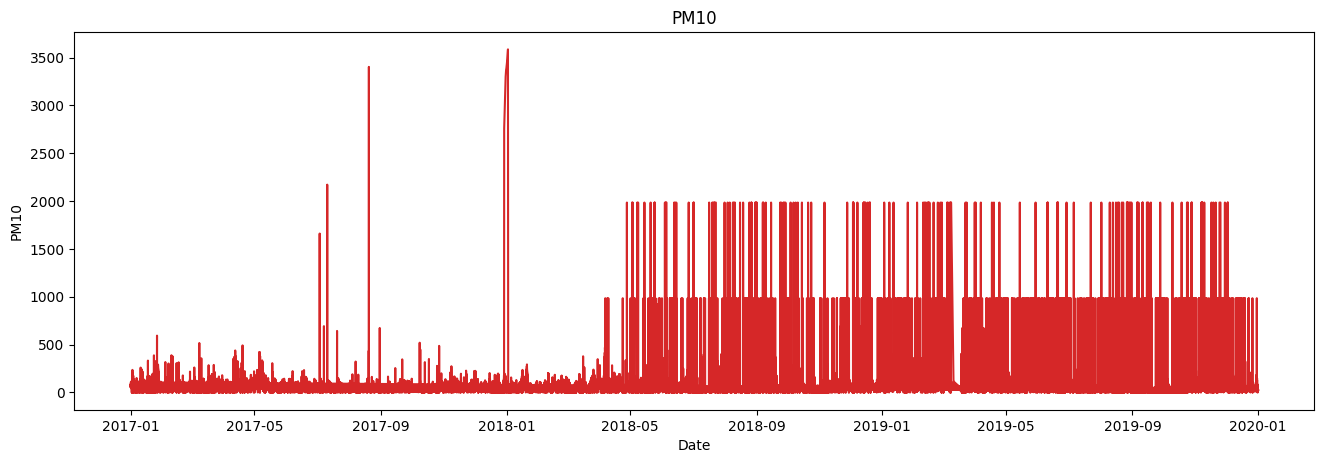

In [17]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='PM10',dpi=100):
  plt.figure(figsize=(16,5),dpi=dpi)
  plt.plot(x,y,color='tab:red')
  plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
  plt.show()

plot_df(df,x=df.index,y=df.PM10,title='PM10')

plot 차트는 해당 프로젝트에 적합하지 않아보이므로 boxplot으로 다시 차트를 그려보았습니다.

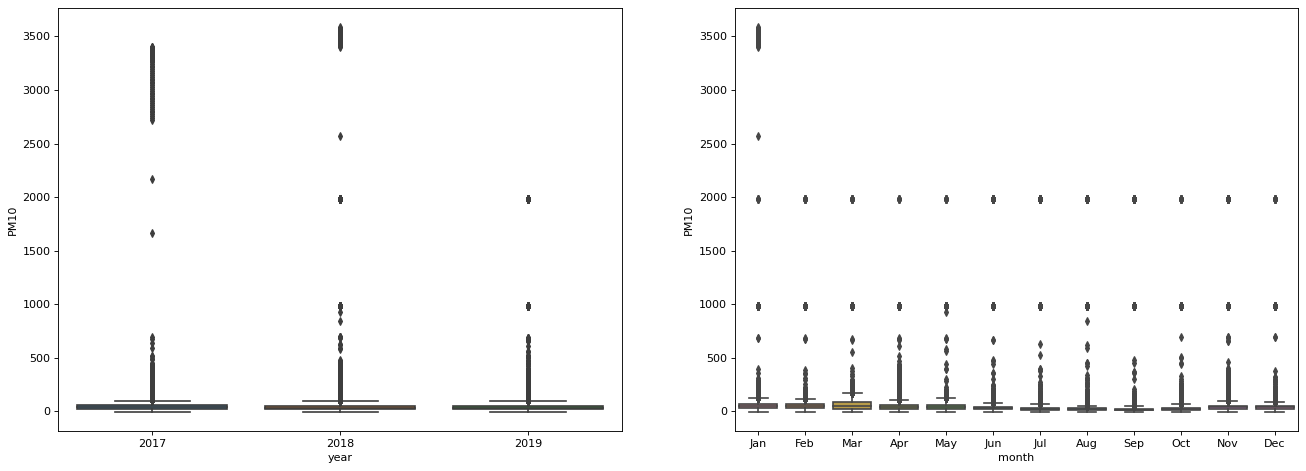

In [18]:
import matplotlib as mpl
import seaborn as sns 
df['year']=[d.year for d in df.index]
df['month']=[d.strftime('%b') for d in df.index]
years = df['year'].unique()

fig, axes =plt.subplots(1,2,figsize=(20,7),dpi=80)
sns.boxplot(x='year',y='PM10',data=df,ax=axes[0])
sns.boxplot(x='month',y='PM10',data=df.loc[~df.year.isin([2017,2020]), :])

분석을 하기위해 너무 튀는 이상치('PM10')에 대해 조절을 하려고 합니다.
방식은 IQR 방식을 사용하려고 합니다.

In [19]:
attribute = 'PM10'

q1 = df[attribute].quantile(.25)
q3 = df[attribute].quantile(.75)

IQR = q3 -q1
outliers_step = 1.5 *IQR
Mdf=df[(df[attribute]>q1-outliers_step)&
    (df[attribute]<q3+outliers_step)]

Mdf

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,year,month
Measurement date,,,,,,,,,,,,
2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2017,Jan
2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2017,Jan
2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2017,Jan
2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2017,Jan
2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2017,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0,2019,Dec
2019-12-31 20:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0,2019,Dec
2019-12-31 21:00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0,2019,Dec


필터링된 최대 평균치

In [20]:
print(Mdf['PM10'].max())
print(Mdf['PM10'].mean())

99.0
36.85336835249017


boxplot으로 다시 한번 확인을 해보겠습니다

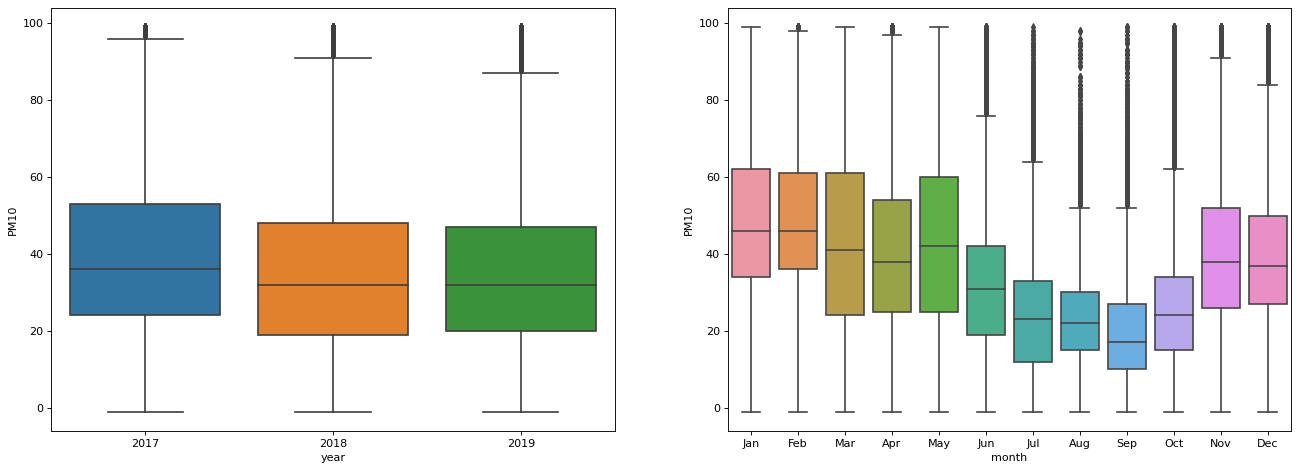

In [21]:
fig, axes =plt.subplots(1,2,figsize=(20,7),dpi=80)
sns.boxplot(x='year',y='PM10',data=Mdf,ax=axes[0])
sns.boxplot(x='month',y='PM10',data=Mdf.loc[~Mdf.year.isin([2017,2020]), :])

인자들끼리 서로의 상관관계를 한번 보기 위해 수치화 및 히트맵을 그려서 
시각화를 진행 하였습니다.

              Station code  Latitude  Longitude  ...      PM10     PM2.5      year
Station code      1.000000 -0.489776   0.047065  ...  0.030143  0.017422  0.000038
Latitude         -0.489776  1.000000   0.307581  ... -0.021874 -0.023076 -0.000051
Longitude         0.047065  0.307581   1.000000  ... -0.022757 -0.018933  0.000017
SO2               0.027527 -0.006797   0.015209  ...  0.048573  0.047531 -0.056431
NO2               0.021526 -0.020962   0.008582  ...  0.055532  0.057844 -0.042220
O3                0.018991  0.000373   0.007398  ...  0.038602  0.033868 -0.043416
CO               -0.034751  0.056444   0.035379  ...  0.151166  0.182867 -0.002773
PM10              0.030143 -0.021874  -0.022757  ...  1.000000  0.228984  0.003505
PM2.5             0.017422 -0.023076  -0.018933  ...  0.228984  1.000000  0.028143
year              0.000038 -0.000051   0.000017  ...  0.003505  0.028143  1.000000

[10 rows x 10 columns]


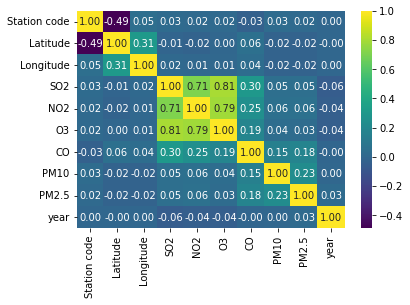

In [22]:
df_corr = df.corr()
print(df.corr())
sns.heatmap(df_corr,cmap='viridis',annot=True, fmt='.2f')
plt.show()

print()

Heatmap을 그려보니 PM10과 PM2.5가 가장 연관 되어있는 것을 볼수가 있었다.
예측하고 싶은것이 연도와 월수에 따른 미래에 미세먼지량이여서
연도와 월수에 대해 회귀분석을 진행하려고 한다. 

In [23]:
import statsmodels.api as sm 
df['month_']=[d.strftime('%d') for d in df.index]

model = sm.OLS(df['PM10'],df[['year','month_']].astype(float)).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                   PM10   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.274
Method:                 Least Squares   F-statistic:                          1.223e+05
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        07:41:47   Log-Likelihood:                     -3.6801e+06
No. Observations:              647511   AIC:                                  7.360e+06
Df Residuals:                  647509   BIC:                                  7.360e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared 값은 평범하게 나왔습니다. 
R-squared란? 값은 작을수록 설명력이 낮으며 1에가까울 수록 설명력이 높을 것을 의미한다. 보통은 0.4이상이 나오면 좋은 모델이라고 한다. 

중국같은 국가가 공장을 다수로 돌릴경우 외부적 요인이 생겨서 쉽계 예측이 불가한 것으로 보인다. 

P>|t| 수치등을 확인하였으며 나머지 항목에 대해서는 [설명란](https://han-py.tistory.com/343)에 기재되어있다.

이제 월에 따른 Polynomial 분석 및 곡선을 한번 확인해보려한다.

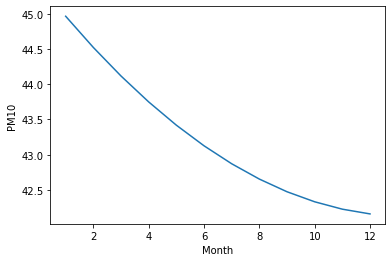

In [24]:
from scipy.optimize import curve_fit
def line(x, a, b, c):
  return a*x + b*x**2 + c

opt, cov = curve_fit(line,df['month_'].astype(float),df['PM10'])
a,b,c = opt
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(x, line(x,a,b,c))
plt.xlabel('Month')
plt.ylabel('PM10')
plt.show()

연도 수에 따른  Polynomial 회귀분석 진행



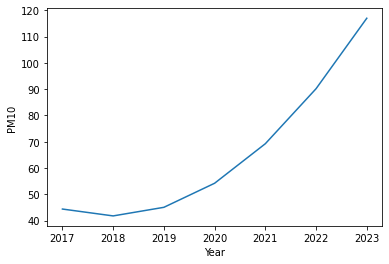

In [25]:
opt, cov = curve_fit(line,df['year'].astype(float),df['PM10'])
a,b,c = opt

x = np.array([2017,2018,2019,2020,2021,2022,2023])
plt.plot(x, line(x,a,b,c))
plt.xlabel('Year')
plt.ylabel('PM10')
plt.show()

봄에 미세먼지량이 심하고 점점 겨울로 갈 수록 감소한다는 것을 볼수 있다. 
또한 현재 다항함수 분석으로는 해가 지나면 지날수록 2018년이후 계속 증가하는 추세를 보여주고 있다. 



[결론]
**하지만 미세먼지라는 것이 연도와 해에 따라 변경되는 것이 아니라 반복적 추이만 보여 줄 뿐이고 우리나라는 지리적 위치가 최대 생산국 중국과 붙어있어 계절에 따른 바람의 영향이 가장 큰 요인으로 작용하는 것 같다.그래서 월,연도에 따른 분석이 가능했던 것 같다. 다른 요인에 대해서도 분석하고 싶고 현재는 시각화와 간단한 분석 정도를 배우고 한 데이터분석이였지만 결론을 낼 수 있어서 좋았던 것 같다.** 


출처: 강원대학교 데이터분석프로그래밍 강의자료,https://rfriend.tistory.com/419, https://m.blog.naver.com/samsjang/221006905415, https://yganalyst.github.io/ml/ML_chap3-3/